# FeatureEngineering

In [11]:
# Drop irrelevant columns
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True, axis=1)

In [12]:
# Map categorical variables to numerical values
map_gen = {"Male": 1, "Female": 0}
map_geo = {"France": 0, "Spain": 1, "Germany": 2}
data["Gender"] = data["Gender"].map(map_gen)
data["Geography"] = data["Geography"].map(map_geo)


Insight:

Dropping irrelevant columns (e.g., RowNumber, CustomerId, Surname) helps streamline the dataset for analysis, also they are irrelevant for the analysis.
Mapping categorical variables (Gender, Geography) to numerical values prepares these features for model input.


In [13]:
# Bin CreditScore into categorical values
data.loc[data['CreditScore'] <= 579, 'CreditScore'] = 0
data.loc[(data['CreditScore'] >= 580) & (data['CreditScore'] <= 669), 'CreditScore'] = 1
data.loc[(data['CreditScore'] >= 670) & (data['CreditScore'] <= 739), 'CreditScore'] = 2
data.loc[(data['CreditScore'] >= 740) & (data['CreditScore'] <= 799), 'CreditScore'] = 3
data.loc[data['CreditScore'] >= 800, 'CreditScore'] = 4
data["CreditScore"] = data["CreditScore"].astype(int)

In [14]:
# Bin Age into categorical values
data.loc[data['Age'] <= 32, 'Age'] = 0
data.loc[(data['Age'] > 32) & (data['Age'] <= 37), 'Age'] = 1
data.loc[(data['Age'] > 37) & (data['Age'] <= 44), 'Age'] = 2
data.loc[data['Age'] > 44, 'Age'] = 3
data["Age"] = data["Age"].astype(int)

<Axes: xlabel='Age', ylabel='count'>

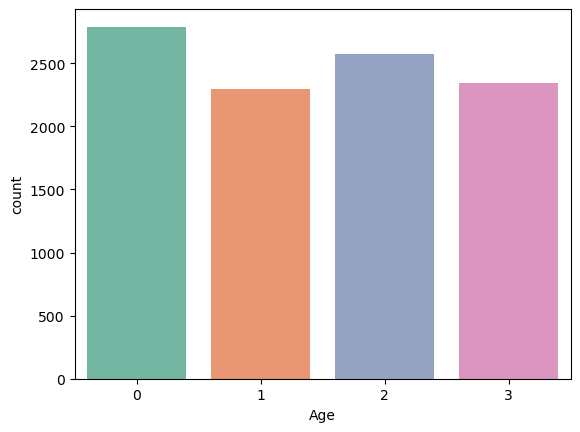

In [15]:
sns.countplot(x="Age",data=data, palette="Set2")

Insight:

Binning CreditScore and Age into categorical ranges simplifies these continuous variables, which can potentially improve model performance and interpretability.
This transformation helps in reducing noise and focusing on significant patterns.

In [16]:
# Separate features and target variable
feature_matrix = data.drop("Exited", axis=1)
target = data["Exited"]


In [17]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(feature_matrix, target, test_size=0.3, random_state=42, stratify=target)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [18]:
y_train.value_counts()

0    5574
1    1426
Name: Exited, dtype: int64

Insight:

The dataset is divided into training (70%), validation (15%), and test (15%) sets.
Stratified splitting ensures that the distribution of the target variable (Exited) is maintained across all sets, providing a balanced and representative sample for training and evaluation.

In [19]:
#Standardization
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

Insight:

Normalizing the feature values using Min-Max scaling ensures that all features contribute equally to the model training, improving convergence and performance of the neural network.